#  Importing Pakages

In [85]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
%matplotlib inline

# Loading Data

In [4]:
#Loading data from 
data=pd.read_csv('diabetes.csv')

# Describing data

In [6]:
#Top 5 rows
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Last 5 rows
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#Data Size
data.size

6912

In [10]:
#Shape of dataset
print(data.shape)
rows,column=data.shape
print('Rows are {0} \nColumns are {1}'.format(rows,column))

(768, 9)
Rows are 768 
Columns are 9


In [11]:
#Data Set Index
data.index

RangeIndex(start=0, stop=768, step=1)

In [12]:
#Column names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
#Information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#Data Description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#Check datatype of each attribute
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

# Remove Insignificant columns


In [18]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We have no insignificant columns in our data set

# Check Missing value for each columns

In [19]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We have 0 nan value in index column.

In [21]:
data[duplicate].shape

(0, 9)

In [24]:
data.size

6912

Size of data frame is 6912

# Formatting your Data – making data types compaitable with other data types.

In [25]:
#Check datatype of each attribute
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
#Sorting data through Glucose and BMI column
list_1=['Glucose','BMI']
data.sort_values(list_1, axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
data 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
502,6,0,68,41,0,39.0,0.727,41,1
349,5,0,80,32,0,41.0,0.346,37,1
...,...,...,...,...,...,...,...,...,...
8,2,197,70,45,543,30.5,0.158,53,1
579,2,197,70,99,0,34.7,0.575,62,1
228,4,197,70,39,744,36.7,2.329,31,0
561,0,198,66,32,274,41.3,0.502,28,1


In [28]:
data=pd.read_csv('diabetes.csv')

# Checking Numerical and categorical data

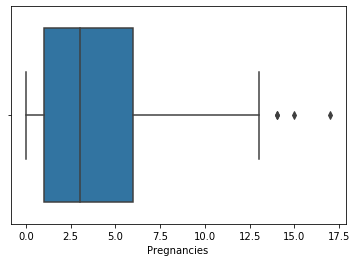

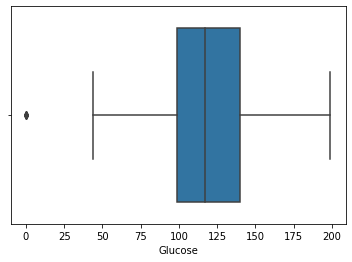

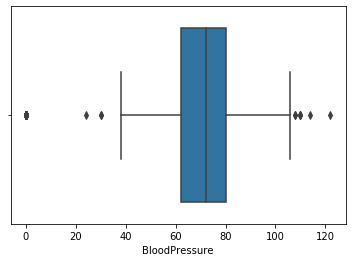

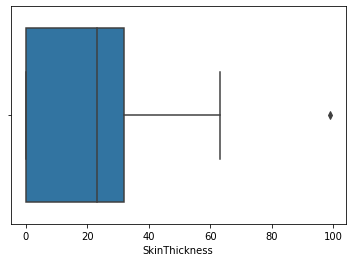

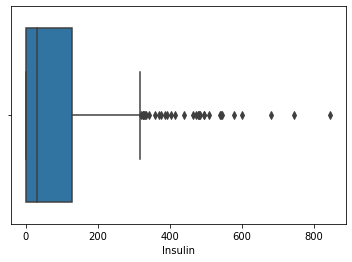

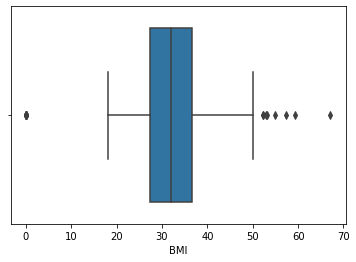

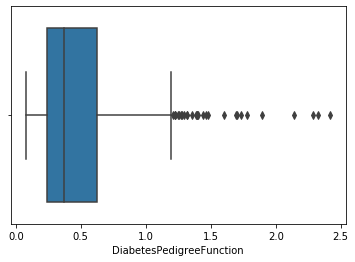

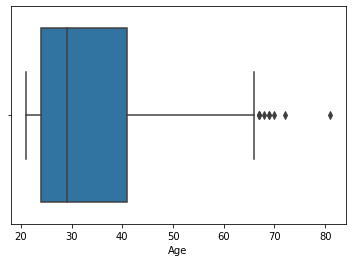

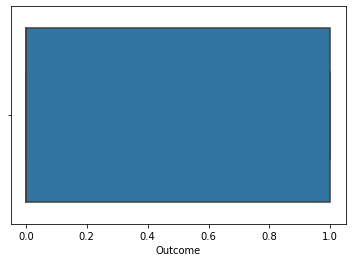

In [32]:
for i in data.describe().columns:
    sns.boxplot(data[i])
    plt.show()

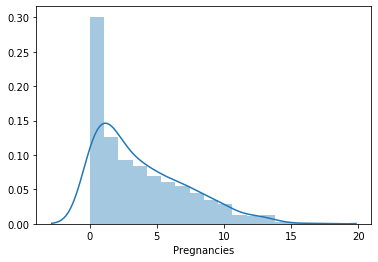

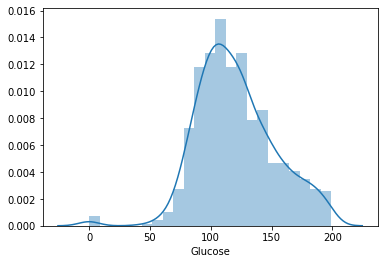

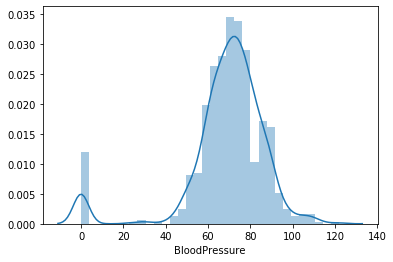

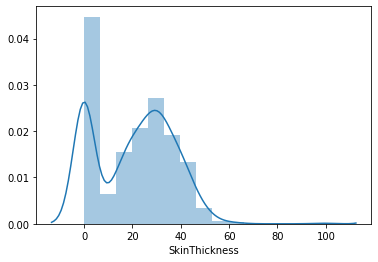

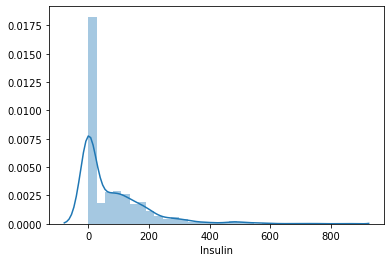

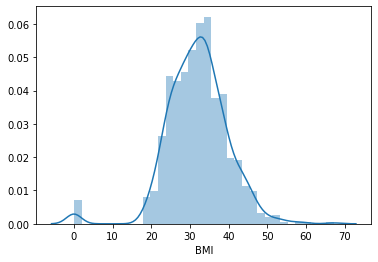

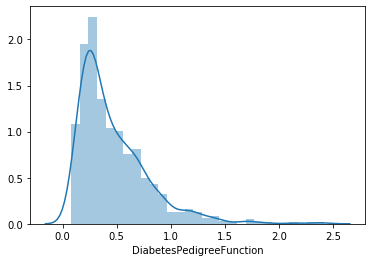

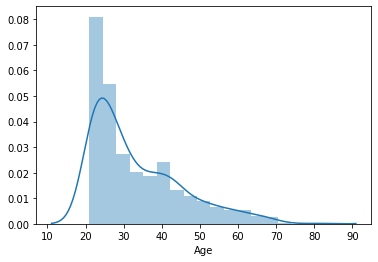

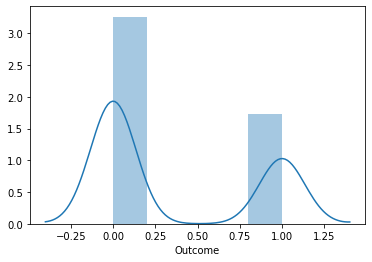

In [34]:
for i in data.describe().columns:
    sns.distplot(data[i])
    plt.show()

# Perform univariate and bivariate analysis and derive meaningful insights about the dataset

In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


# Univariate Ananlysis

### Glucose Distribution

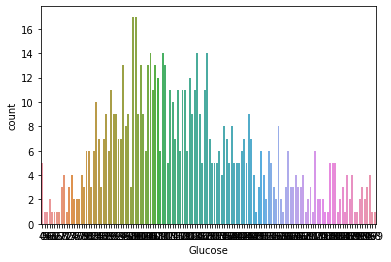

In [36]:
sns.countplot(x='Glucose',data=data)

### Pregnancy Distribution

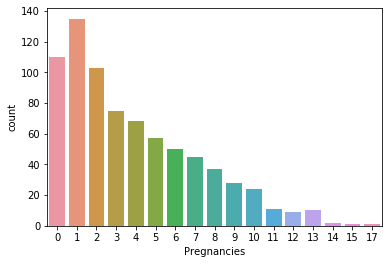

In [98]:
sns.countplot(x='Pregnancies',data=data)

### BMI Distribution

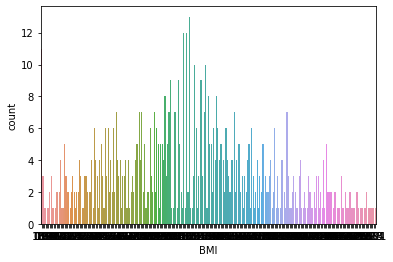

In [99]:
sns.countplot(x='BMI',data=data)

### Skin Thickness

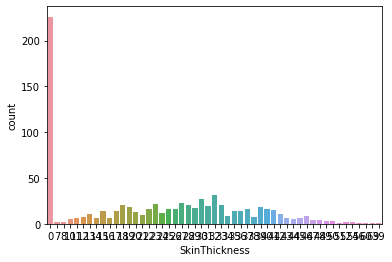

In [40]:
sns.countplot(x='SkinThickness',data=data)

### Blood Pressure Distribution

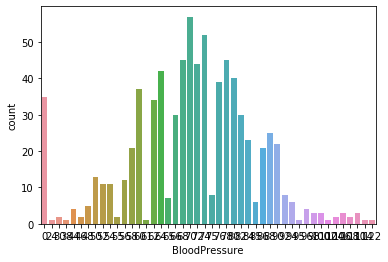

In [41]:
sns.countplot(x='BloodPressure',data=data)

### Insuin Distribution

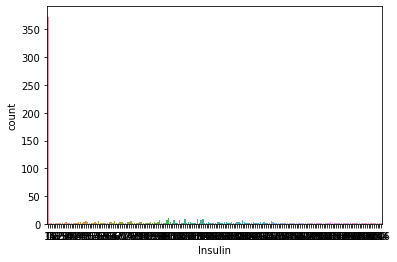

In [42]:
sns.countplot(x='Insulin',data=data)

### Age Distribution

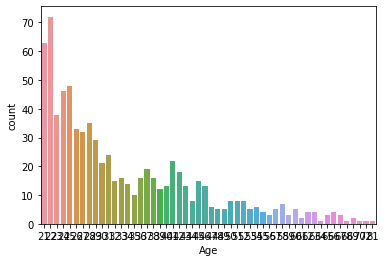

In [43]:
sns.countplot(x='Age',data=data)

### DiabetesPedigreeFunction Distribution

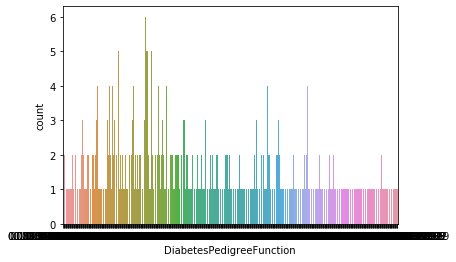

In [44]:
sns.countplot(x='DiabetesPedigreeFunction',data=data)

### Outcome distribution

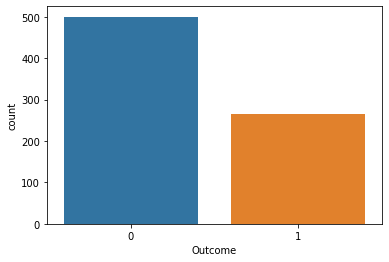

In [45]:
sns.countplot(x='Outcome',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000010EB36048>,
      dtype=object)

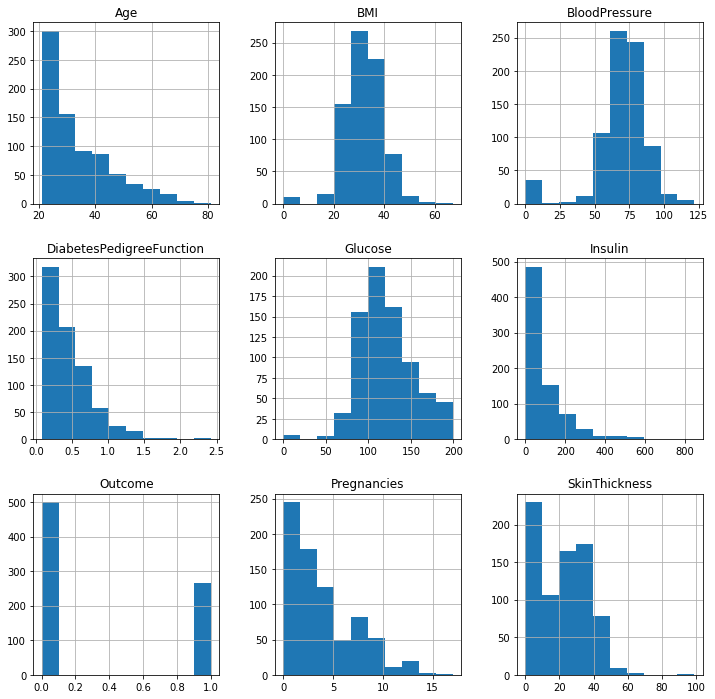

In [46]:
data.hist(figsize=(12,12))

# Bivariate analysis

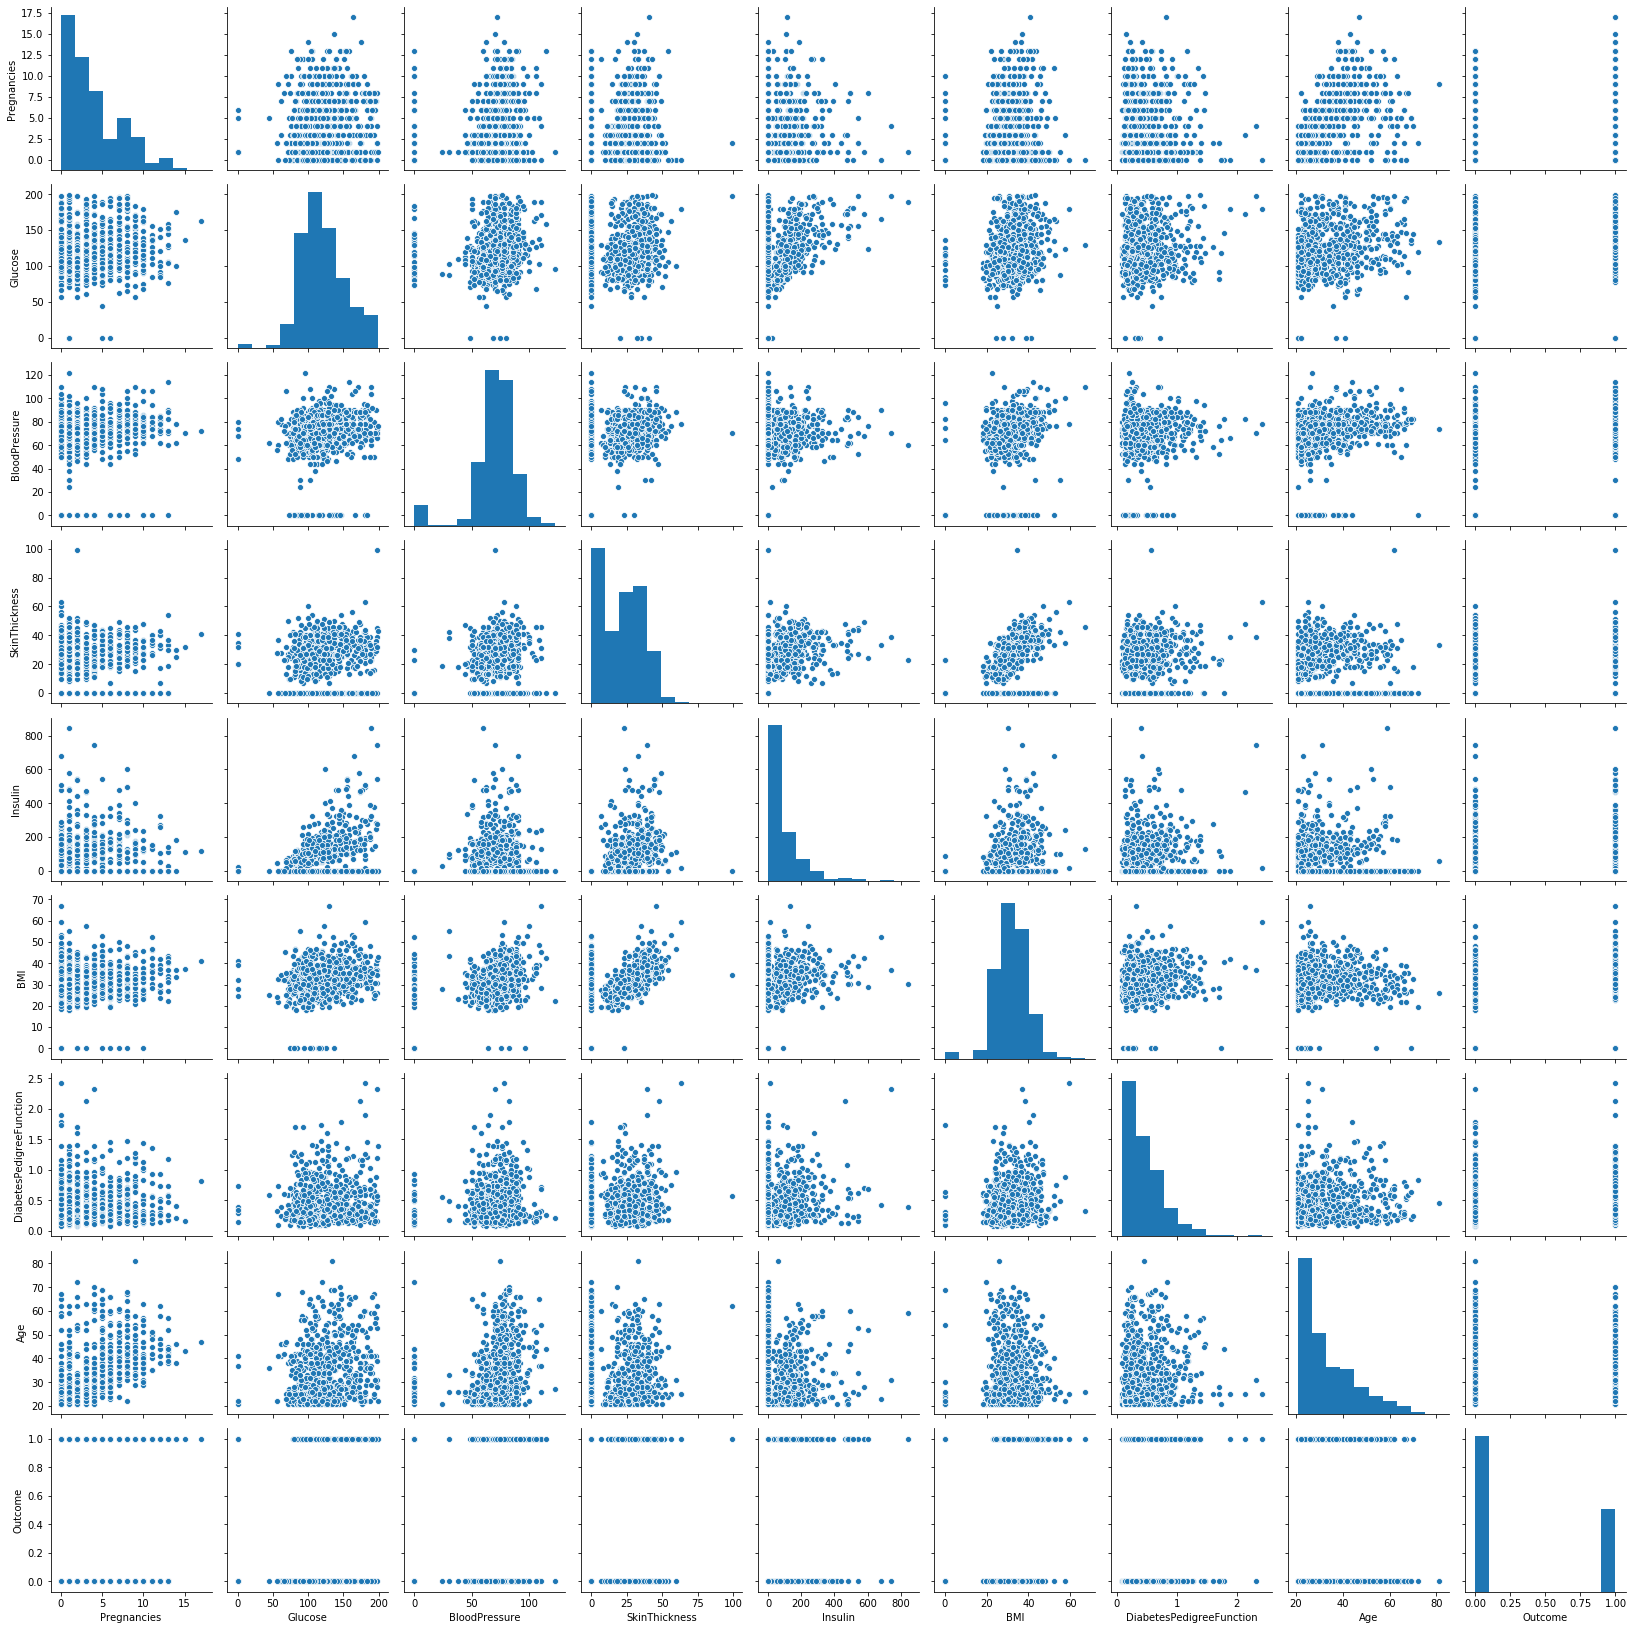

In [49]:
sns.pairplot(data)

### BMI VS OUTCOME

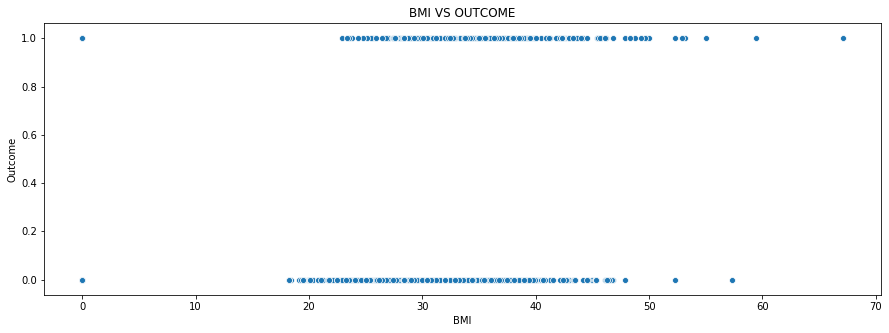

In [50]:
plt.figure(figsize=(15,5))
plt.title("BMI VS OUTCOME")
plt.show(sns.scatterplot(x="BMI",y="Outcome",data=data))

### Pregnancies vs Outcome

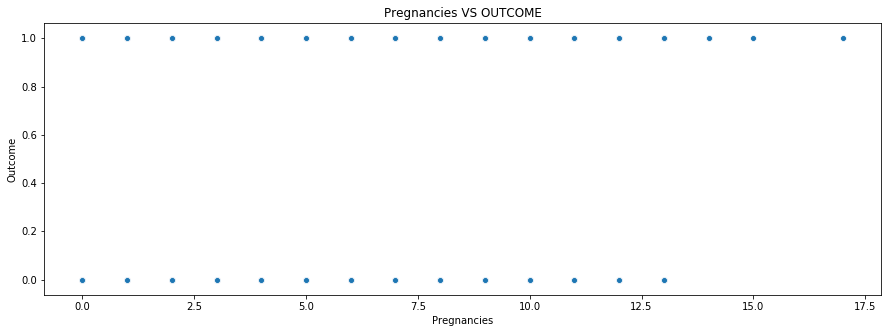

In [51]:
plt.figure(figsize=(15,5))
plt.title("Pregnancies VS OUTCOME")
plt.show(sns.scatterplot(x="Pregnancies",y="Outcome",data=data))

### Pregnancies vs Insulin

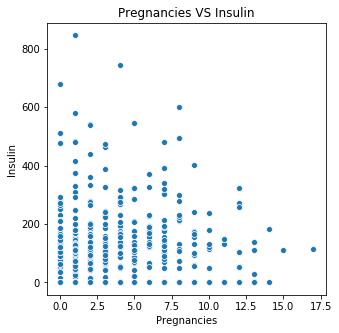

In [96]:
plt.figure(figsize=(5,5))
plt.title("Pregnancies VS Insulin")
plt.show(sns.scatterplot(x="Pregnancies",y="Insulin",data=data))

### Insulin vs Glucose

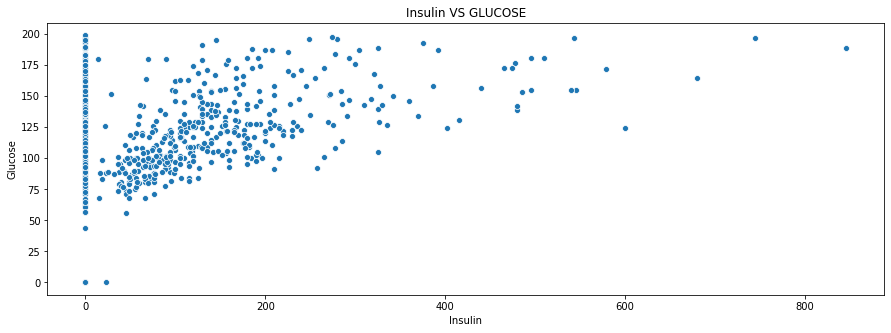

In [97]:
plt.figure(figsize=(15,5))
plt.title("Insulin VS GLUCOSE")
plt.show(sns.scatterplot(x="Insulin",y="Glucose",data=data))

### Insulin vs Outcome

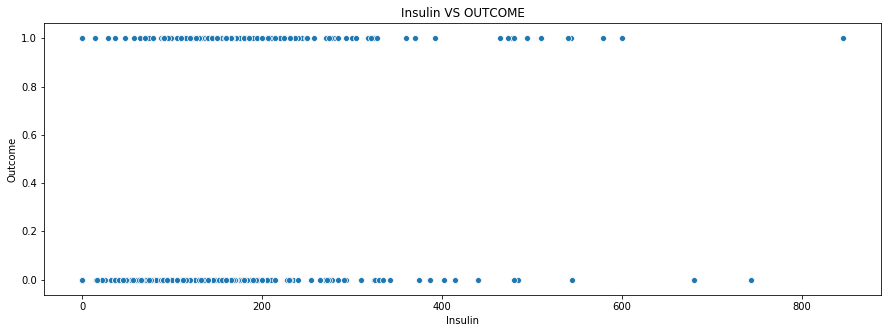

In [52]:
plt.figure(figsize=(15,5))
plt.title("Insulin VS OUTCOME")
plt.show(sns.scatterplot(x="Insulin",y="Outcome",data=data))

### DiabetesPedigreeFunction VS OUTCOME

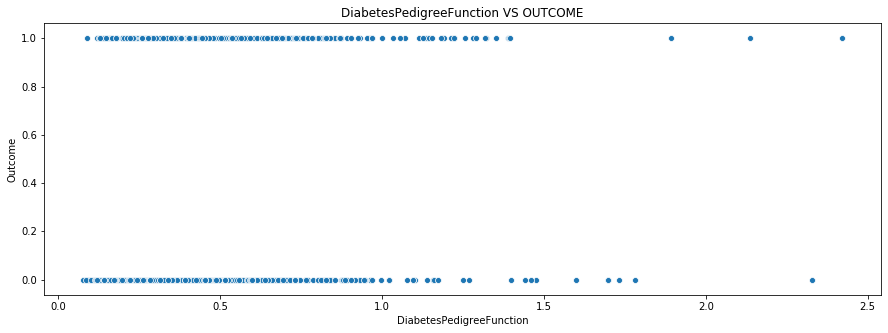

In [86]:
plt.figure(figsize=(15,5))
plt.title("DiabetesPedigreeFunction VS OUTCOME")
plt.show(sns.scatterplot(x="DiabetesPedigreeFunction",y="Outcome",data=data))

<Figure size 2160x360 with 0 Axes>

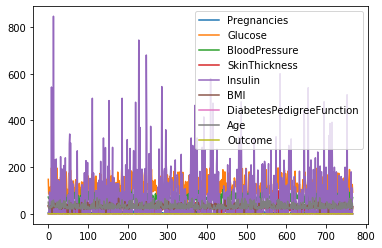

In [87]:
plt.figure(figsize=(30,5))
data.plot.line()

# Detecting Outliners

### Finding ouliners using Boxplot 

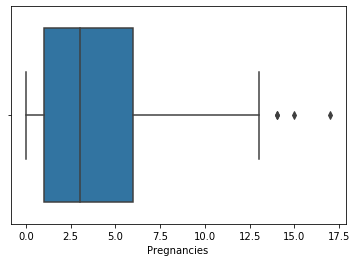

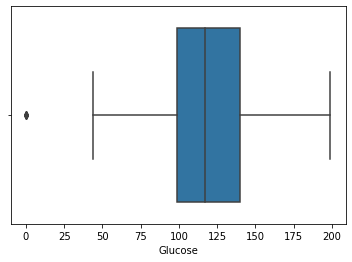

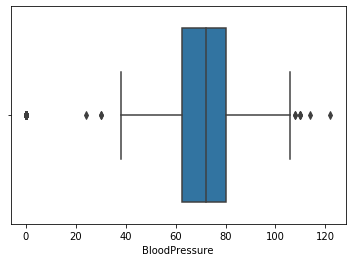

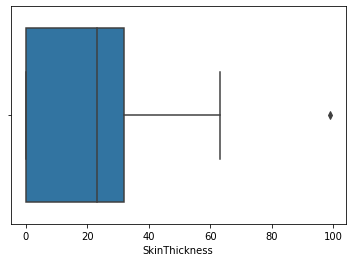

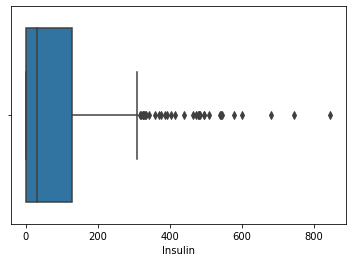

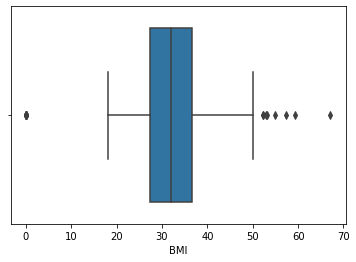

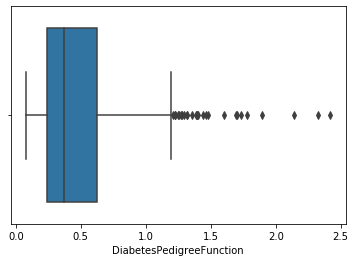

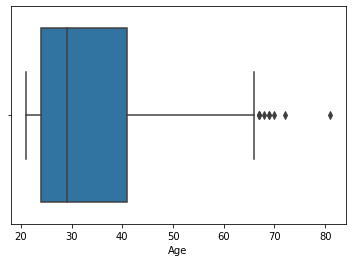

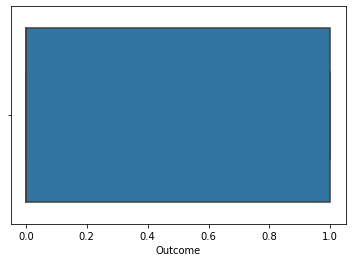

In [88]:
for i in data.describe().columns:
    sns.boxplot(data[i])
    plt.show()

### Outliners using Scatterplot

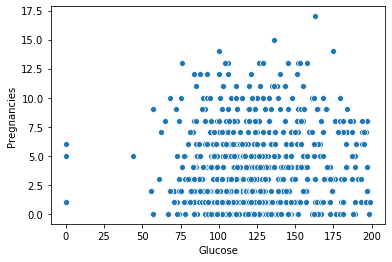

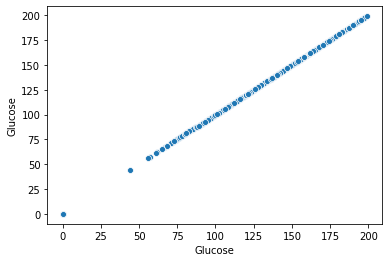

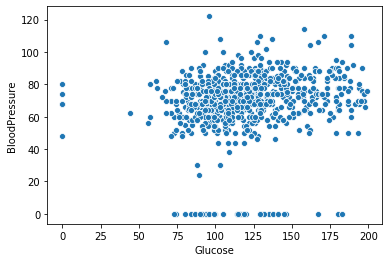

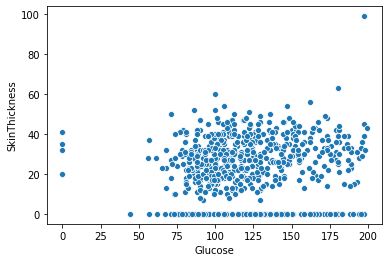

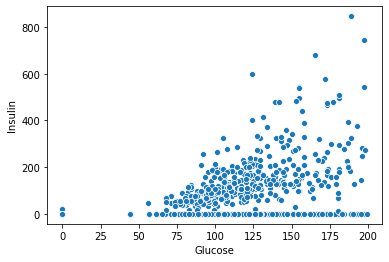

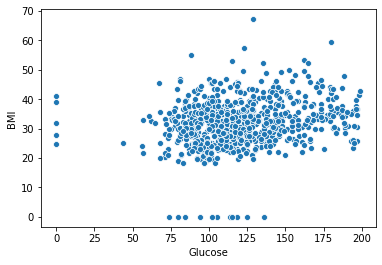

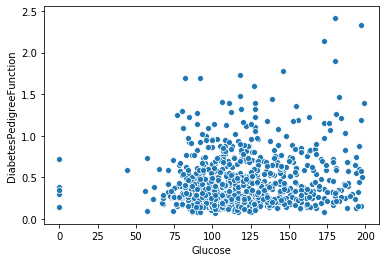

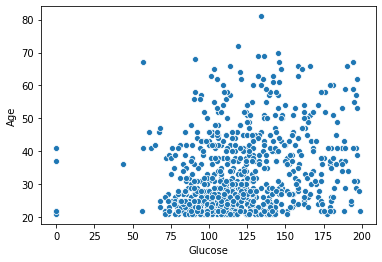

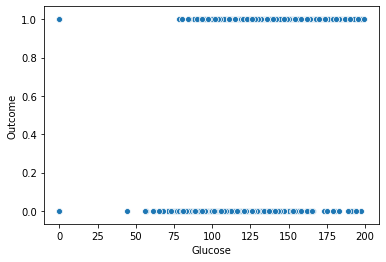

In [90]:
for i in data.describe().columns:
    sns.scatterplot(x='Glucose',y=i,data=data)
    plt.show()

# Building Correlation matrix

In [95]:
data.corr

<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

# Heat Map

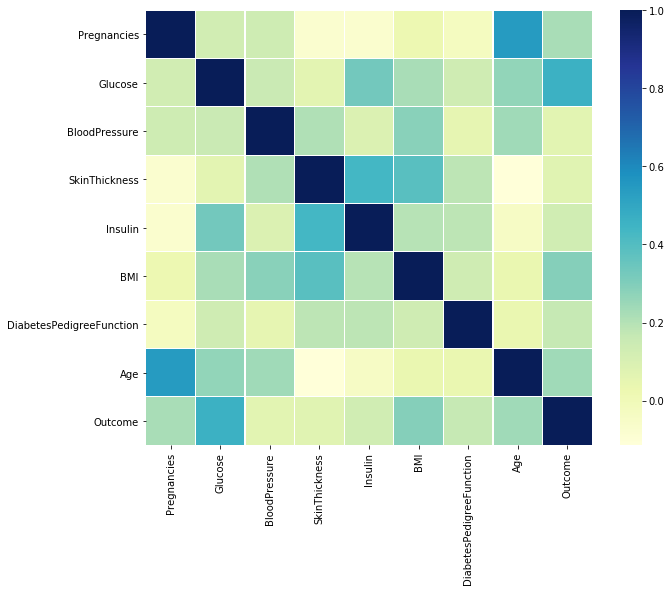

In [94]:
corr = data.corr() 
i, axis = plt.subplots(figsize =(10, 8)) 
sns.heatmap(corr, ax = axis, cmap ="YlGnBu", linewidths = 0.1)

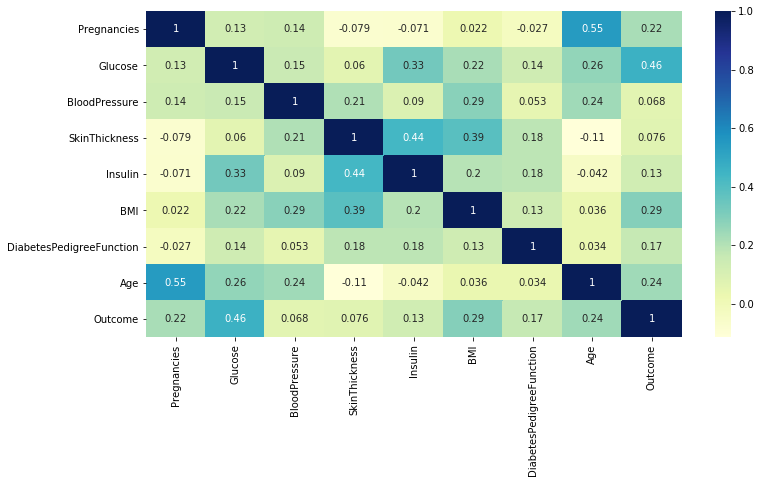

In [92]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

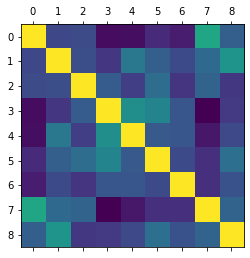

In [93]:
plt.matshow(data.corr())
plt.show()